In [1]:
import pandas as pd

In [2]:
df = pd.read_table('SMSSpamCollection', sep ='\t', names=['is_spam','message'])
df.head()

,is_spam,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df['is_spam']=df['is_spam'].map({'spam':1,'ham':0})
df.head()

,is_spam,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
#Baseline Accuracy
1-df['is_spam'].mean()

0.8659368269921034

# OUR BASELINE IS 87%! Gotta beat this!

In [5]:
df['message_length']=df['message'].apply(lambda x: len(x))

In [6]:
df.head()

,is_spam,message,message_length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [7]:
df.groupby('is_spam').describe()

message_length
is_spam                      
0       count     4825.000000
        mean        71.558964
        std         58.459702
        min          2.000000
        25%         33.000000
        50%         52.000000
        75%         93.000000
        max        910.000000
1       count      747.000000
        mean       139.119143
        std         28.998900
        min         13.000000
        25%        133.000000
        50%        149.000000
        75%        158.000000
        max        224.000000

In [8]:
df.corr()

,is_spam,message_length
is_spam,1.000000,0.383587
message_length,0.383587,1.000000


In [9]:
df.shape

(5572, 3)

In [10]:
df.drop_duplicates('message',inplace=True)

In [11]:
df.shape

(5169, 3)

In [12]:
#New Baseline
1-df['is_spam'].mean()

0.873669955503966

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
X=df['message']
y=df['is_spam']

In [15]:
vect = CountVectorizer(stop_words='english')

In [16]:
X_vect = vect.fit_transform(X)

In [17]:
X_vect

<5169x8444 sparse matrix of type '<type 'numpy.int64'>'
	with 39664 stored elements in Compressed Sparse Row format>

# X_vect is a SPARSE MATRIX! Values located in matrix with a tuple showing location

In [18]:
print(X_vect)

  (0, 8083)	1
  (0, 1064)	1
  (0, 3515)	1
  (0, 2007)	1
  (0, 1717)	1
  (0, 4374)	1
  (0, 8285)	1
  (0, 3555)	1
  (0, 1719)	1
  (0, 1284)	1
  (0, 2282)	1
  (0, 5779)	1
  (0, 4248)	1
  (1, 5403)	1
  (1, 8191)	1
  (1, 4216)	1
  (1, 4410)	1
  (1, 5377)	1
  (2, 77)	1
  (2, 1141)	1
  (2, 6104)	1
  (2, 7754)	1
  (2, 7077)	1
  (2, 6052)	1
  (2, 6158)	1
  :	:
  (5164, 466)	1
  (5164, 5150)	1
  (5164, 8260)	1
  (5164, 2013)	1
  (5164, 5934)	1
  (5164, 6104)	1
  (5165, 2921)	1
  (5165, 3267)	1
  (5165, 3484)	1
  (5165, 3813)	1
  (5166, 7217)	1
  (5166, 5711)	1
  (5166, 5022)	1
  (5167, 1515)	1
  (5167, 911)	1
  (5167, 4067)	1
  (5167, 3609)	1
  (5167, 1753)	1
  (5167, 3392)	1
  (5167, 2546)	1
  (5167, 4512)	1
  (5167, 8129)	1
  (5167, 3280)	1
  (5168, 6366)	1
  (5168, 7709)	1


In [19]:
df.loc[0,'message']

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [20]:
vect.get_feature_names()[2007]

u'cine'

In [21]:
X_vect.shape

(5169, 8444)

#### There are 5169 MESSAGES, with 8444 UNIQUE WORDS (after removing stop words)

In [22]:
dtm = pd.DataFrame(X_vect.toarray(), columns=vect.get_feature_names())

In [23]:
dtm.iloc[0:10,2000:2014]

,christians,christmas,christmassy,chuck,chuckin,church,ciao,cine,cinema,citizen,city,citylink,cl,claim
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,2
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
dtm = pd.concat([dtm,df['is_spam']], axis=1)
dtm.head()

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud,is_spam
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
grouped = dtm.groupby('is_spam').mean().T.sort_values(1.0, ascending=False)
grouped.rename(columns={0:'ham',1:'spam'}, inplace=True)
grouped.head()

is_spam,ham,spam
free,0.044265,0.071545
good,0.039981,0.069919
just,0.069015,0.055285
ll,0.044741,0.055285
lt,0.056878,0.052033


In [26]:
grouped['delta']=grouped['spam']-grouped['ham']
grouped.head()

is_spam,ham,spam,delta
free,0.044265,0.071545,0.027280
good,0.039981,0.069919,0.029938
just,0.069015,0.055285,-0.013730
ll,0.044741,0.055285,0.010544
lt,0.056878,0.052033,-0.004845


In [27]:
grouped.sort_values('delta',ascending=False).head()

is_spam,ham,spam,delta
good,0.039981,0.069919,0.029938
free,0.044265,0.071545,0.027280
dont,0.024988,0.045528,0.020540
text,0.031652,0.048780,0.017129
reply,0.024036,0.040650,0.016614


# Suggested that Multinomial Naive Bayes might the best for this problem. HOwever, we haven't learned it yet!
# So lets use LogisticRegression instead!

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split

In [29]:
cross_val_score(LogisticRegression(),X_vect,y,scoring='accuracy').mean()

0.97542988394769914

##### 97.5%, piece of cake
just to review, logistic regression assigns the BEST COEFFICIENTS to each FEATURE (each unique word) across all INSTANCES (SMS messages).  It WEIGHTS the words to give us the most accurate predictions.

In [30]:
# stop words will drop all words in a given dictionary, max_features drops least frequent terms
# these parameters ultimately impact our model!
# binary True disregards how many times a word occurs, just focuses on whether it occurs or not
# ngram - clusters of words side by side
# min_df - word must occur in at least 2 documents, or minimum % of documents
# max_df - same as above, but for maximum
vect=CountVectorizer(
    stop_words='english',
    max_features=5000,
    binary=True,
    ngram_range=(1,2),
    min_df=2,
    max_df=.4)

In [31]:
X_vect = vect.fit_transform(X)

In [32]:
lr = LogisticRegression()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_vect,y,random_state=2003)

In [34]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
lr.coef_

array([[ 0.40643707,  0.00728713,  0.29891312, ..., -0.01923492,
         0.13338246,  0.10110386]])

In [36]:
coef = pd.DataFrame(lr.coef_.T, index=vect.get_feature_names(), columns=['coef'])

In [37]:
coef.sort_values('coef', ascending=False).head(10)

,coef
uk,2.185804
www,1.757956
mobile,1.731508
50,1.721639
text,1.689237
150p,1.671244
txt,1.647055
claim,1.641440
ringtone,1.641011
message,1.628433


In [38]:
from sklearn import metrics

In [39]:
pred = lr.predict(X_test)

In [40]:
metrics.accuracy_score(y_test,pred)

0.98066511987625682

In [41]:
metrics.confusion_matrix(y_test,pred)

array([[1130,    2],
       [  23,  138]])

In [42]:
print metrics.classification_report(y_test,pred)

             precision    recall  f1-score   support

          0       0.98      1.00      0.99      1132
          1       0.99      0.86      0.92       161

avg / total       0.98      0.98      0.98      1293



# what types of messages are we missing? trying to find the false positives!

In [43]:
test_df=df.loc[y_test.index,:].copy()

In [44]:
test_df['pred']=pred
test_df.head()

,is_spam,message,message_length,pred
714,0,Save yourself the stress. If the person has a ...,125,0
3880,0,She left it very vague. She just said she woul...,257,0
5342,1,u r subscribed 2 TEXTCOMP 250 wkly comp. 1st w...,156,1
756,0,So why didnt you holla?,23,0
4379,0,"Doing nothing, then u not having dinner w us?",45,0


In [45]:
# BOOM! FALSE POSITIVES!
test_df.loc[(test_df['pred']==1) & (test_df['is_spam']==0),:]

,is_spam,message,message_length,pred
2340,0,Cheers for the message Zogtorius. Ive been st...,108,1
2379,0,"Hi, Mobile no. &lt;#&gt; has added you in th...",158,1


In [46]:
# BOOM! FALSE NEGATIVES!
test_df.loc[(test_df['pred']==0) & (test_df['is_spam']==1),:]

,is_spam,message,message_length,pred
1217,1,You have 1 new voicemail. Please call 08719181...,50,0
4144,1,In The Simpsons Movie released in July 2007 na...,146,0
2774,1,How come it takes so little time for a child w...,124,0
1118,1,"449050000301 You have won a £2,000 price! To c...",70,0
4475,1,Want explicit SEX in 30 secs? Ring 02073162414...,65,0
4256,1,Block Breaker now comes in deluxe format with ...,157,0
869,1,Hello. We need some posh birds and chaps to us...,134,0
68,1,"Did you hear about the new ""Divorce Barbie""? I...",78,0
3419,1,LIFE has never been this much fun and great un...,136,0
1777,1,Call FREEPHONE 0800 542 0578 now!,33,0


In [47]:
lr.predict_proba(X_test)

array([[  9.49032622e-01,   5.09673777e-02],
       [  9.99182682e-01,   8.17317911e-04],
       [  1.63987424e-03,   9.98360126e-01],
       ..., 
       [  9.43547133e-01,   5.64528668e-02],
       [  9.91377469e-01,   8.62253102e-03],
       [  9.79139622e-01,   2.08603782e-02]])

In [48]:
prob = lr.predict_proba(X_test)[:,1]

In [49]:
fpr,tpr,thresholds = metrics.roc_curve(y_test,prob)

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

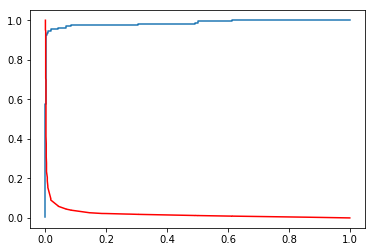

In [51]:
#This ROC curve plots the true positive rate vs false positive rate at various threshold settings.
plt.plot(fpr,tpr)
plt.plot(fpr,thresholds, color='red')

In [52]:
# HERE I AM CHANGING MY PREDICTIONS BASED ON A NEW THRESHOLD OF 0.1
test_df['prob'] = prob
test_df['pred'] = test_df['prob'].apply(lambda x: 1 if x > .1 else 0)

In [53]:
test_df.head()

,is_spam,message,message_length,pred,prob
714,0,Save yourself the stress. If the person has a ...,125,0,0.050967
3880,0,She left it very vague. She just said she woul...,257,0,0.000817
5342,1,u r subscribed 2 TEXTCOMP 250 wkly comp. 1st w...,156,1,0.998360
756,0,So why didnt you holla?,23,0,0.017079
4379,0,"Doing nothing, then u not having dinner w us?",45,0,0.008548


# OKAY, BACK TO VECTORIZER. IF WE PUT IT IN A PIPELINE, WE CAN TUNE OUR VECTORIZER FEATURES!!!!

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [68]:
pipe=Pipeline([('vect',CountVectorizer()),('lr',LogisticRegression())])

In [76]:
params = {
    'vect__binary':[True,False],
    'vect__stop_words':[None,'english'],
    'lr__penalty':['l1','l2'],
    'vect__ngram_range':[(1,1),(1,2),(1,3)],
    'vect__min_df': range(1,5)
}

In [77]:
gs = GridSearchCV(pipe, param_grid=params, cv=5, scoring='accuracy')

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=2003)

In [79]:
gs.fit(X_train, y_train)
gs.best_score_

0.98013415892672862

In [80]:
gs.best_params_

{'lr__penalty': 'l2',
 'vect__binary': True,
 'vect__min_df': 2,
 'vect__ngram_range': (1, 3),
 'vect__stop_words': None}

# No need to clean data first, can just predict on test, and pipeline takes care of it!!!